In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import sklearn

In [2]:
raw_counts = pd.read_csv("../../CAR_data/raw_counts_post_qc_genes_of_interest.csv")
#cell_meta = pd.read_csv("../../CAR_data/AD_qc_count_cell_meta.csv")
#gene_meta = pd.read_csv("../../CAR_data/AD_qc_count_gene_meta.csv")

In [3]:
raw_counts

,CAR_Variant,CD28,PI3K,Lck,Grb2,GADS,Akt,ERK12,GSK3b,CD3z,...,HLA-DQB1,ACTB,RPS18,UBE2D2,RPLP0,B2M,PTPRC,Type,cell_type,CAR_Variant.1
0,h4-1BB_h4-1BB,1.0,2.0,6.0,8.0,2.0,3.0,0.0,1.0,14.0,...,0.0,150.0,207.0,13.0,111.0,158.0,4.0,NaN,NaN,h4-1BB_h4-1BB
1,h4-1BB_hIL15RA,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,...,0.0,24.0,25.0,3.0,10.0,30.0,1.0,NaN,NaN,h4-1BB_hIL15RA
2,hIL15RA_hCD28,0.0,0.0,5.0,4.0,4.0,2.0,1.0,0.0,5.0,...,1.0,146.0,118.0,4.0,58.0,156.0,12.0,NaN,NaN,hIL15RA_hCD28
3,hIL15RA_hCTLA-4,0.0,0.0,2.0,2.0,7.0,0.0,1.0,1.0,7.0,...,7.0,162.0,23.0,6.0,20.0,113.0,11.0,NaN,NaN,hIL15RA_hCTLA-4
4,hCTLA-4_hCD40,1.0,0.0,9.0,8.0,10.0,0.0,7.0,0.0,19.0,...,0.0,423.0,287.0,12.0,101.0,285.0,40.0,NaN,NaN,hCTLA-4_hCD40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,TCR-,0.0,1.0,5.0,1.0,5.0,0.0,3.0,0.0,3.0,...,10.0,302.0,50.0,6.0,23.0,99.0,14.0,NaN,NaN,TCR-
4747,TCR-,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,3.0,...,2.0,65.0,18.0,0.0,6.0,84.0,6.0,NaN,NaN,TCR-
4748,TCR-,0.0,2.0,0.0,2.0,0.0,0.0,1.0,0.0,1.0,...,0.0,55.0,53.0,5.0,29.0,53.0,8.0,NaN,NaN,TCR-
4749,TCR-,1.0,0.0,8.0,10.0,4.0,0.0,3.0,2.0,9.0,...,12.0,350.0,195.0,5.0,99.0,133.0,25.0,NaN,NaN,TCR-


# Depth normalisation of the raw counts

# Evaluate the amount of dropout in TF expression

In [8]:
TF = pickle.load(open("../../CAR_data/TF_list", "rb"))
TF.remove("AP1")

In [10]:
TF_counts = raw_counts[TF]

In [14]:
iszero = (TF_counts == 0)
iszero.sum().sum()

111265

In [15]:
iszero

,ATF1,ATF2,BCL3,CEBPB,CEBPZ,E2F4,ELK1,ELK4,ESR1,ETS1,...,Bcl2,BclXL,GADS,IFNG,IL2,IL6,NFAT,TNFa,cmyc,mTOR
0,False,False,True,False,False,False,True,False,True,False,...,False,False,False,False,True,True,False,True,False,True
1,True,True,True,True,False,True,True,True,True,True,...,True,False,False,True,True,True,False,True,False,True
2,True,False,False,True,False,True,True,False,False,False,...,False,False,False,True,True,True,False,False,True,False
3,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,True,True,False,True,False,True
4,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4746,True,False,True,False,True,True,True,False,True,False,...,False,True,False,True,True,True,False,True,True,False
4747,True,True,True,True,True,True,True,False,True,False,...,False,True,True,True,True,True,False,True,False,True
4748,True,False,True,True,False,True,True,True,True,True,...,False,True,True,True,True,True,True,True,False,True
4749,True,True,False,False,False,False,True,True,True,False,...,False,True,False,True,True,True,False,True,False,False


In [16]:
111265/(4751*43)

0.544634422129001

<AxesSubplot:xlabel='ATF1', ylabel='Count'>

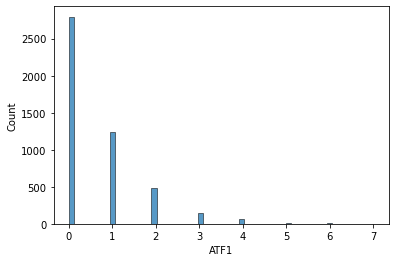

In [28]:
# Histogram of the distribution of a TF

sns.histplot(raw_counts["ATF1"])

0.0
0.0


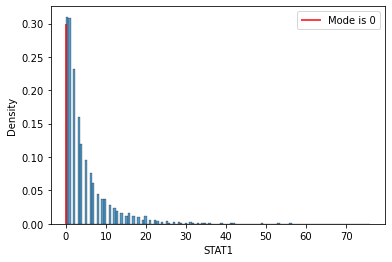

In [37]:
sns.histplot(raw_counts["STAT1"], stat = "density")

mode = pd.Series.mode(raw_counts["STAT1"])[0]
print(mode/2)
plt.vlines(x = mode/2, ymin = 0, ymax = 0.3, colors = 'r', label = "Mode is 0")
plt.legend()
print(len(raw_counts[raw_counts["STAT1"]<(mode/2)])/4751)

# Evaluate dropout of housekeeping genes

In [7]:
housekeeping_df = raw_counts[["ACTB",
"RPS18",
"UBE2D2",
"RPLP0",
"B2M",
"PTPRC"]]

<AxesSubplot:xlabel='ACTB', ylabel='Count'>

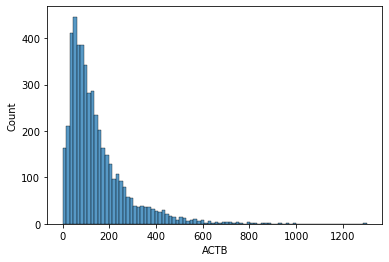

In [5]:
sns.histplot(data = housekeeping_df, x = "ACTB")

<AxesSubplot:xlabel='RPS18', ylabel='Count'>

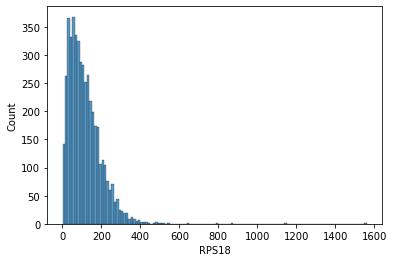

In [6]:
sns.histplot(data = housekeeping_df, x = "RPS18")

<AxesSubplot:xlabel='UBE2D2', ylabel='Count'>

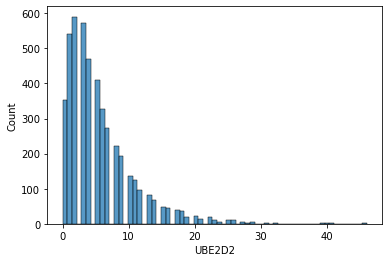

In [7]:
sns.histplot(data = housekeeping_df, x = "UBE2D2")

<AxesSubplot:xlabel='RPLP0', ylabel='Count'>

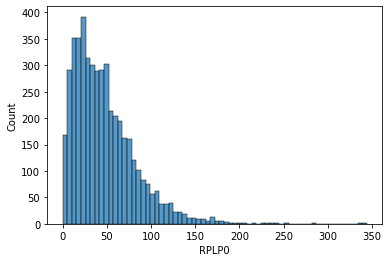

In [8]:
sns.histplot(data = housekeeping_df, x = "RPLP0")

<AxesSubplot:xlabel='B2M', ylabel='Count'>

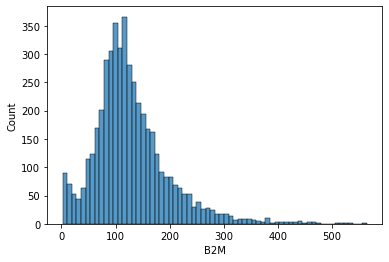

In [9]:
sns.histplot(data = housekeeping_df, x = "B2M")

<AxesSubplot:xlabel='PTPRC', ylabel='Count'>

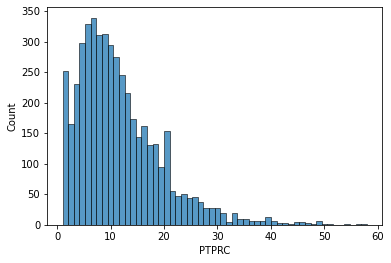

In [10]:
sns.histplot(data = housekeeping_df, x = "PTPRC")

In [11]:
# We'll consider that the values < mean/10


housekeeping_df["ACTB_decile"] = housekeeping_df["ACTB"]<(housekeeping_df["ACTB"].median()/5)
housekeeping_df["RPS18_decile"] = housekeeping_df["RPS18"]<(housekeeping_df["RPS18"].median()/5)
housekeeping_df["UBE2D2_decile"] = housekeeping_df["UBE2D2"]<(housekeeping_df["UBE2D2"].median()/5)
housekeeping_df["RPLP0_decile"] = housekeeping_df["RPLP0"]<(housekeeping_df["RPLP0"].median()/5)
housekeeping_df["B2M_decile"] = housekeeping_df["B2M"]<(housekeeping_df["B2M"].median()/5)
housekeeping_df["PTPRC_decile"] = housekeeping_df["PTPRC"]<(housekeeping_df["PTPRC"].median()/5)

/tmp/ipykernel_348095/2830930958.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housekeeping_df["ACTB_decile"] = housekeeping_df["ACTB"]<(housekeeping_df["ACTB"].median()/5)
/tmp/ipykernel_348095/2830930958.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housekeeping_df["RPS18_decile"] = housekeeping_df["RPS18"]<(housekeeping_df["RPS18"].median()/5)
/tmp/ipykernel_348095/2830930958.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [12]:
housekeeping_df

,ACTB,RPS18,UBE2D2,RPLP0,B2M,PTPRC,ACTB_decile,RPS18_decile,UBE2D2_decile,RPLP0_decile,B2M_decile,PTPRC_decile
0,150.0,207.0,13.0,111.0,158.0,4.0,False,False,False,False,False,False
1,24.0,25.0,3.0,10.0,30.0,1.0,False,False,False,False,False,True
2,146.0,118.0,4.0,58.0,156.0,12.0,False,False,False,False,False,False
3,162.0,23.0,6.0,20.0,113.0,11.0,False,False,False,False,False,False
4,423.0,287.0,12.0,101.0,285.0,40.0,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4746,302.0,50.0,6.0,23.0,99.0,14.0,False,False,False,False,False,False
4747,65.0,18.0,0.0,6.0,84.0,6.0,False,True,True,True,False,False
4748,55.0,53.0,5.0,29.0,53.0,8.0,False,False,False,False,False,False
4749,350.0,195.0,5.0,99.0,133.0,25.0,False,False,False,False,False,False


In [13]:
# See what's the proportion of small values

prop_ACTB = housekeeping_df["ACTB_decile"].sum()/4751
prop_RPS18 = housekeeping_df["RPS18_decile"].sum()/4751
prop_UBE2D2 = housekeeping_df["UBE2D2_decile"].sum()/4751
prop_RPLP0 = housekeeping_df["RPLP0_decile"].sum()/4751
prop_B2M = housekeeping_df["B2M_decile"].sum()/4751
prop_PTPRC = housekeeping_df["PTPRC_decile"].sum()/4751

In [14]:
print(prop_ACTB)
print(prop_RPS18)
print(prop_UBE2D2)
print(prop_RPLP0)
print(prop_B2M)
print(prop_PTPRC)

0.04862134287518417
0.05683014102294254
0.07430014733740266
0.058303515049463274
0.03999158071984845
0.02631025047358451


In [5]:
import scipy.stats

40.0
0.043569774784255944


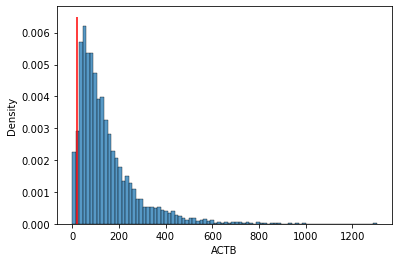

In [15]:
fit_alpha, fit_loc, fit_beta=scipy.stats.gamma.fit(housekeeping_df["ACTB"])
sns.histplot(housekeeping_df["ACTB"], stat="density")
#plt.plot(np.linspace(0,1200, 2000), scipy.stats.gamma.pdf(np.linspace(0,1200, 2000), fit_alpha, fit_loc, fit_beta), 'r')

#mode =( fit_alpha-1)*fit_beta
mode = pd.Series.mode(housekeeping_df["ACTB"])[0]
plt.vlines(x = mode/2, ymin =0, ymax = 0.0065, color = "r")
print(mode)
print(len(housekeeping_df[housekeeping_df["ACTB"]<(mode/2)])/4751)

53.57522620920472
0.09155967164807409


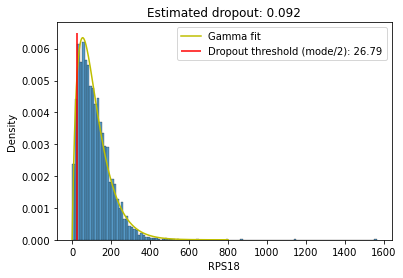

In [18]:
fit_alpha, fit_loc, fit_beta=scipy.stats.gamma.fit(housekeeping_df["RPS18"])
sns.histplot(housekeeping_df["RPS18"], stat="density")
plt.plot(np.linspace(0,800, 2000), scipy.stats.gamma.pdf(np.linspace(0,800, 2000), fit_alpha, fit_loc, fit_beta), 'y', label = "Gamma fit")

mode =( fit_alpha-1)*fit_beta

plt.vlines(x = mode/2, ymin = 0, ymax = 0.0065, colors = 'r', label = f"Dropout threshold (mode/2): 26.79")
plt.legend()
plt.title("Estimated dropout: 0.092")
print(mode)
print(len(housekeeping_df[housekeeping_df["RPS18"]<(mode/2)])/4751)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


43.0
0.06630183119343296


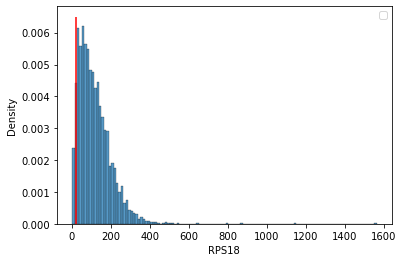

In [19]:
sns.histplot(housekeeping_df["RPS18"], stat="density")

mode = pd.Series.mode(housekeeping_df["RPS18"])[0]

plt.vlines(x = mode/2, ymin = 0, ymax = 0.0065, colors = 'r')
plt.legend()
#plt.title("Estimated dropout: 0.092")
print(mode)
print(len(housekeeping_df[housekeeping_df["RPS18"]<(mode/2)])/4751)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


2.0
0.07430014733740266


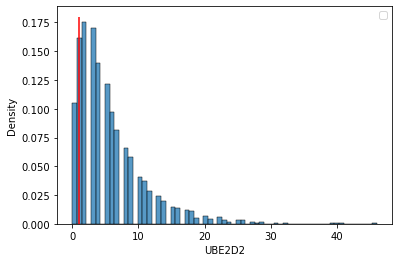

In [25]:

sns.histplot(housekeeping_df["UBE2D2"], stat="density")
mode = pd.Series.mode(housekeeping_df["UBE2D2"])[0]


plt.vlines(x = mode/2, ymin = 0, ymax = 0.18, colors = 'r')
plt.legend()
#plt.title("Estimated dropout: 0.092")
print(mode)
print(len(housekeeping_df[housekeeping_df["UBE2D2"]<(mode/5)])/4751)

-0.8845249334278616
0.0


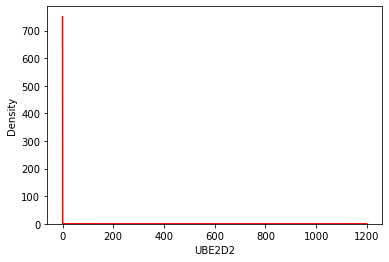

In [20]:
fit_alpha, fit_loc, fit_beta=scipy.stats.gamma.fit(housekeeping_df["UBE2D2"])
sns.histplot(housekeeping_df["UBE2D2"], stat="density")
plt.plot(np.linspace(0,1200, 2000), scipy.stats.gamma.pdf(np.linspace(0,1200, 2000), fit_alpha, fit_loc, fit_beta), 'r')

mode =( fit_alpha-1)*fit_beta
print(mode)
print(len(housekeeping_df[housekeeping_df["UBE2D2"]<(mode/5)])/4751)

19.0
0.08292990949273837


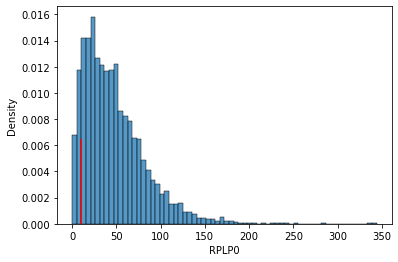

In [22]:

sns.histplot(housekeeping_df["RPLP0"], stat="density")

mode = pd.Series.mode(housekeeping_df["RPLP0"])[0]


print(mode)
plt.vlines(x = mode/2, ymin = 0, ymax = 0.0065, colors = 'r')
print(len(housekeeping_df[housekeeping_df["RPLP0"]<(mode/2)])/4751)

21.517043858061292
0.09661123973900232


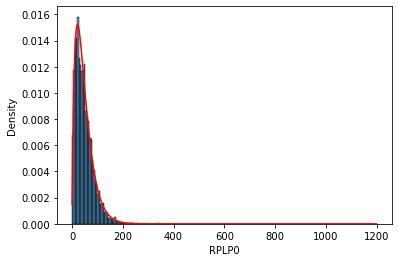

In [19]:
fit_alpha, fit_loc, fit_beta=scipy.stats.gamma.fit(housekeeping_df["RPLP0"])
sns.histplot(housekeeping_df["RPLP0"], stat="density")
plt.plot(np.linspace(0,1200, 2000), scipy.stats.gamma.pdf(np.linspace(0,1200, 2000), fit_alpha, fit_loc, fit_beta), 'r')

mode =( fit_alpha-1)*fit_beta
print(mode)
print(len(housekeeping_df[housekeeping_df["RPLP0"]<(mode/2)])/4751)

58.0
0.10334666386023995


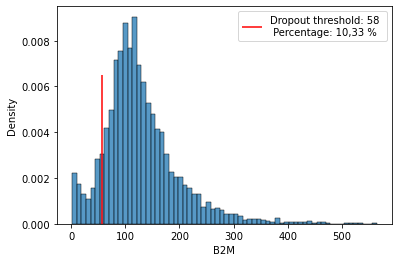

In [28]:

sns.histplot(housekeeping_df["B2M"], stat="density")
mode = pd.Series.mode(housekeeping_df["B2M"])[0]
print(mode/2)
plt.vlines(x = mode/2, ymin = 0, ymax = 0.0065, colors = 'r', label = "Dropout threshold: 58 \n Percentage: 10,33 %")
print(len(housekeeping_df[housekeeping_df["B2M"]<(mode/2)])/4751)
plt.legend()

401.0018823550288
0.8735003157230057


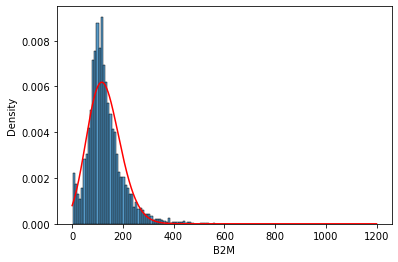

In [20]:
fit_alpha, fit_loc, fit_beta=scipy.stats.gamma.fit(housekeeping_df["B2M"])
sns.histplot(housekeeping_df["B2M"], stat="density")
plt.plot(np.linspace(0,1200, 2000), scipy.stats.gamma.pdf(np.linspace(0,1200, 2000), fit_alpha, fit_loc, fit_beta), 'r')

mode =( fit_alpha-1)*fit_beta
print(mode)
print(len(housekeeping_df[housekeeping_df["B2M"]<(mode/2)])/4751)

In [20]:
# This does not work for B2M but we can try by seeing how many have counts < 50

print(len(housekeeping_df[housekeeping_df["B2M"]<50])/4751)

0.07872026941696485


6.35288584448712
0.08756051357608924


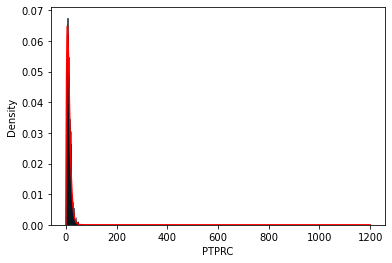

In [21]:
fit_alpha, fit_loc, fit_beta=scipy.stats.gamma.fit(housekeeping_df["PTPRC"])
sns.histplot(housekeeping_df["PTPRC"], stat="density")
plt.plot(np.linspace(0,1200, 2000), scipy.stats.gamma.pdf(np.linspace(0,1200, 2000), fit_alpha, fit_loc, fit_beta), 'r')

mode =( fit_alpha-1)*fit_beta
print(mode)
print(len(housekeeping_df[housekeeping_df["PTPRC"]<(mode/2)])/4751)

3.5
0.08756051357608924


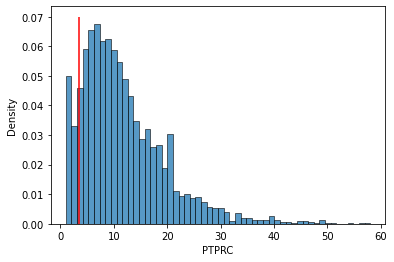

In [31]:
sns.histplot(housekeeping_df["PTPRC"], stat="density")
mode = pd.Series.mode(housekeeping_df["PTPRC"])[0]
print(mode/2)
plt.vlines(x = mode/2, ymin = 0, ymax = 0.07, colors = 'r', label = "Dropout threshold: 58 \n Percentage: 10,33 %")
print(len(housekeeping_df[housekeeping_df["PTPRC"]<(mode/2)])/4751)

I would use this to conclude there is very little technical zeros. 

# Regression model on the raw counts

Let us see if the regression models obtain better results when predicting from the raw counts

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [23]:
# Load the TFs and the parents node dict
upstream_nodes_dict = pickle.load(open("../../CAR_data/upstream_node_dict", "rb"))
TFs = pickle.load(open("../../CAR_data/TF_list", "rb"))

In [24]:


## Create the training and test split
train_val_split = train_test_split(raw_counts, test_size=0.1, random_state=2)
raw_counts_training = train_val_split[0]
raw_counts_validation = train_val_split[1]


## Check that all domains are represented in the training set
n_CAR = np.unique(raw_counts_training["CAR_Variant"])
print(f"There are {len(n_CAR)}/31 CAR Variants in the mixed training set")

There are 31/31 CAR Variants in the mixed training set


ATF1
ATF2
BCL3
CEBPB
CEBPZ
E2F4
ELK1
ELK4
ESR1
ETS1
FOS
FOSL1
FOSL2
GABPA
GATA1
GATA2
HSF1
IRF3
JUN
JUND
MEF2A
MEF2C
MYC
NANOG
NFAT
NFATC1
REST
RXRA
SP1
STAT1
STAT3
STAT5
TAL1
Bcl2
BclXL
GADS
IFNG
IL2
IL6
TNFa
cmyc
mTOR
ATF1:  (0.2663087933524897, 0.014575589393197919) 
ATF2:  (0.08507002982570633, 0.04426551602449902) 
BCL3:  (0.7267259174728353, -0.06510831375169612) 
CEBPB:  (0.04109062558396104, 0.003701485579245656) 
CEBPZ:  (0.32583817163779905, 0.1958028132178793) 
E2F4:  (0.8330476010763033, 0.23863028257603203) 
ELK1:  (0.09938945810619393, -0.01169445660107482) 
ELK4:  (0.6879205709994914, -0.10522889428242554) 
ESR1:  (0.5465558678175904, -0.4682552937172402) 
ETS1:  (0.8163847534429454, 0.2015316163264801) 
FOS:  (0.8450638955233462, -0.15918783438063833) 
FOSL1:  (0.2077121264603582, -0.06418512821739797) 
FOSL2:  (0.683441217540492, -0.21474229369651887) 
GABPA:  (0.7259491606430077, -0.06882454012925487) 
GATA1:  (1.0, 1.0) 
GATA2:  (0.7662503502453231, 0.0) 
HSF1:  (0.7

/tmp/ipykernel_348095/47890836.py:41: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


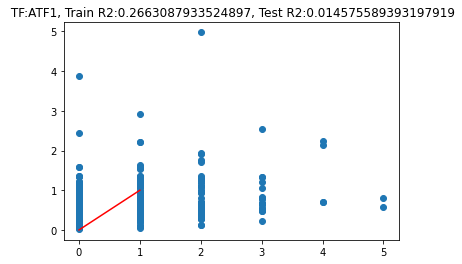

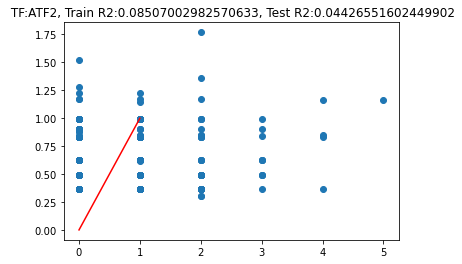

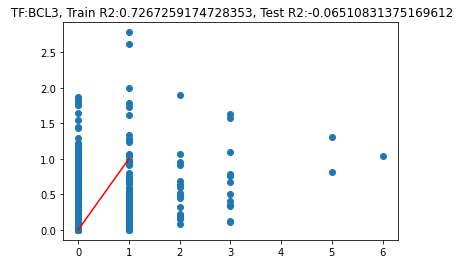

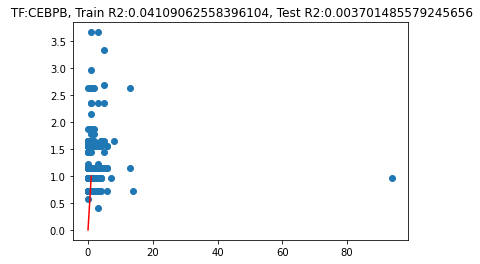

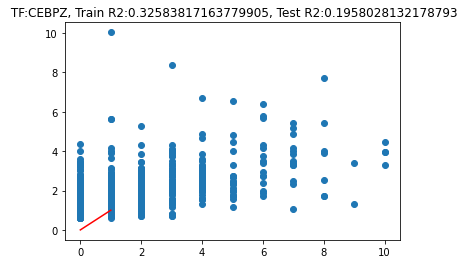

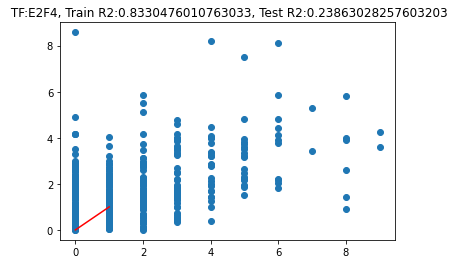

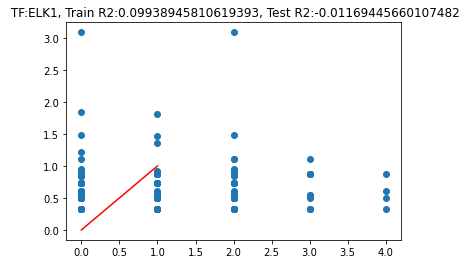

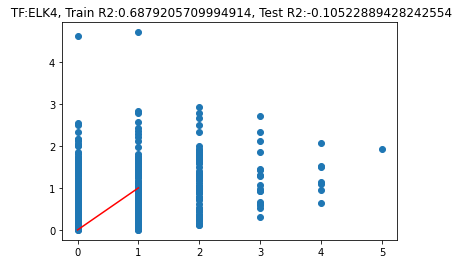

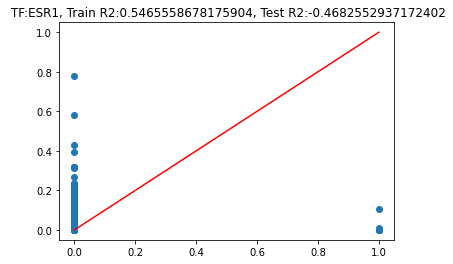

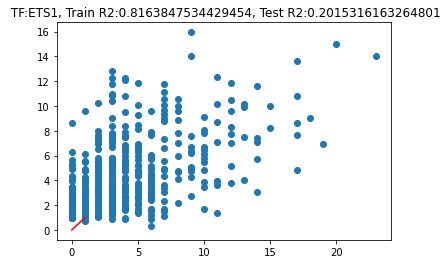

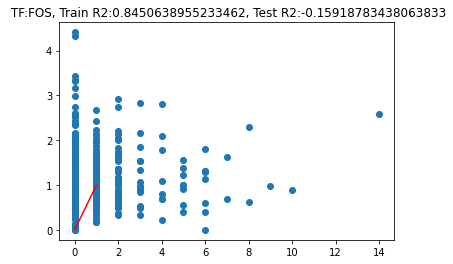

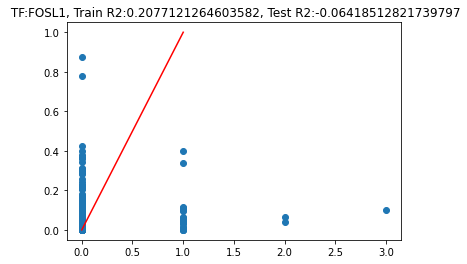

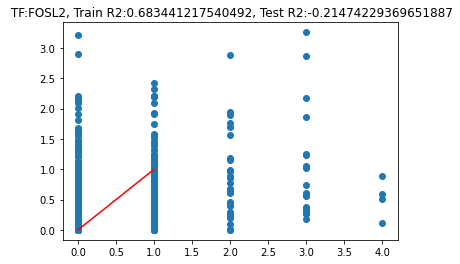

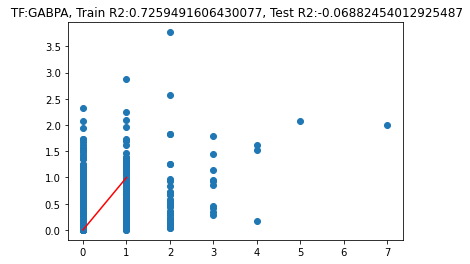

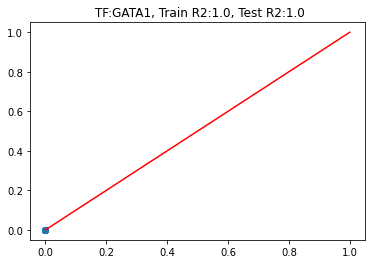

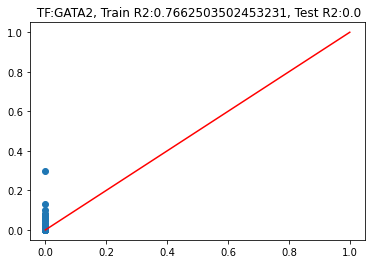

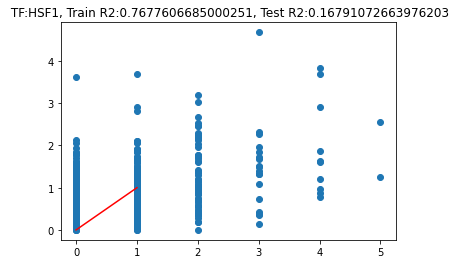

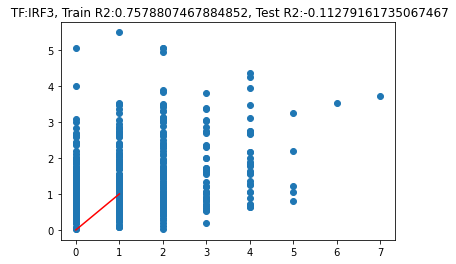

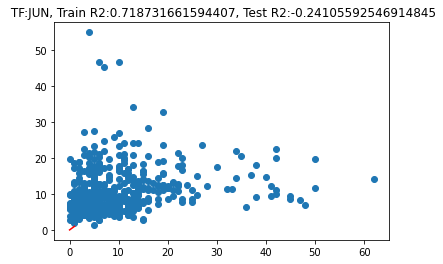

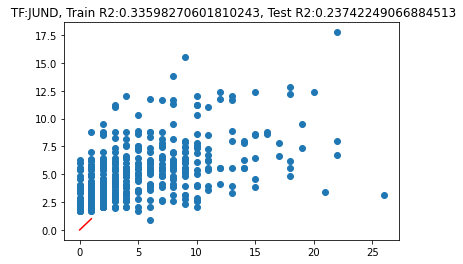

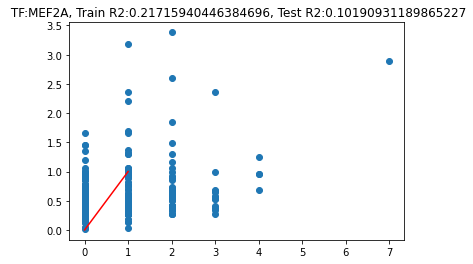

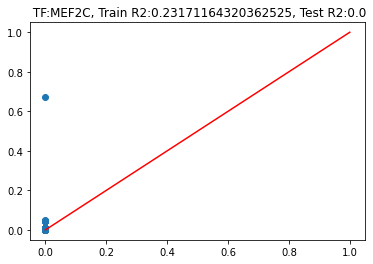

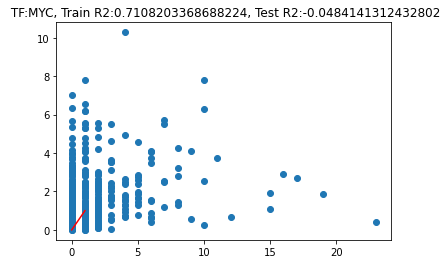

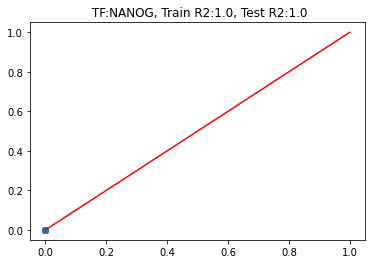

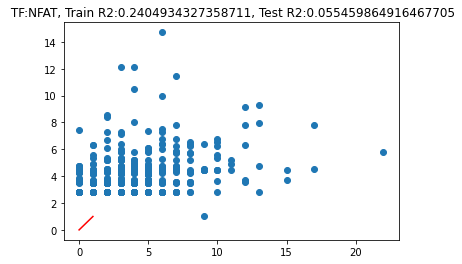

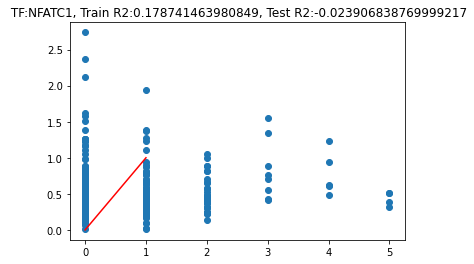

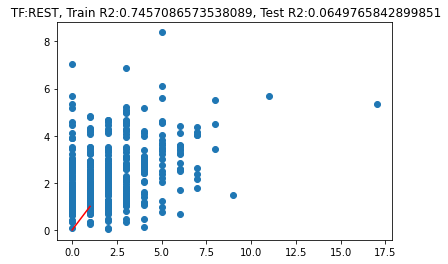

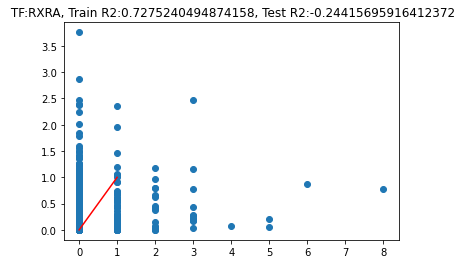

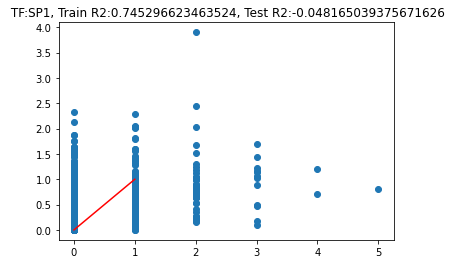

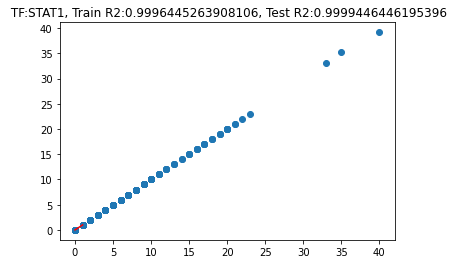

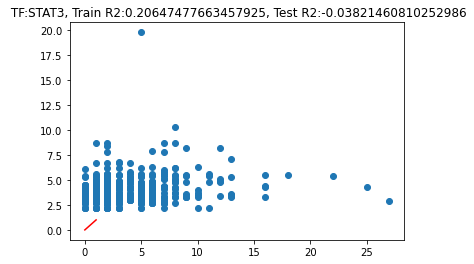

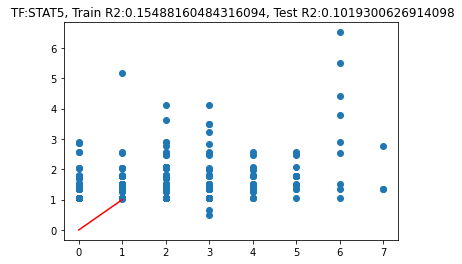

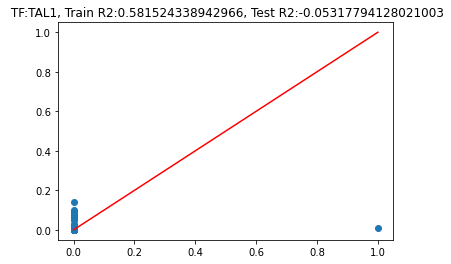

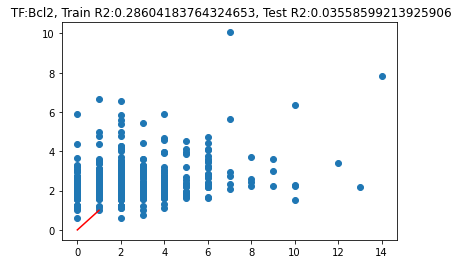

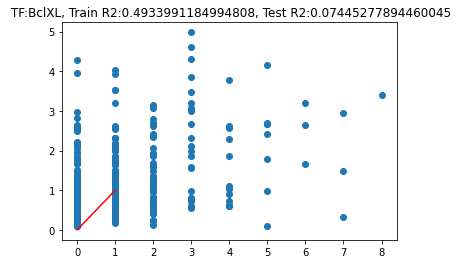

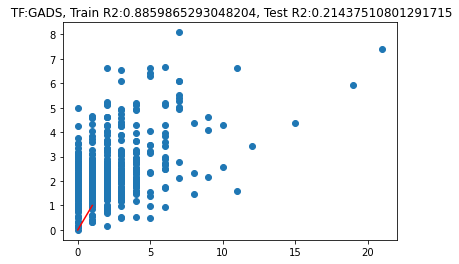

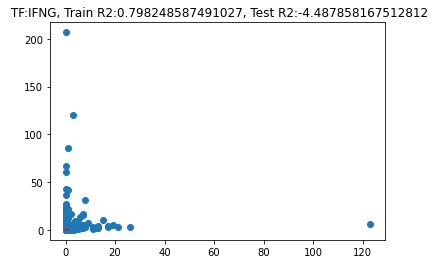

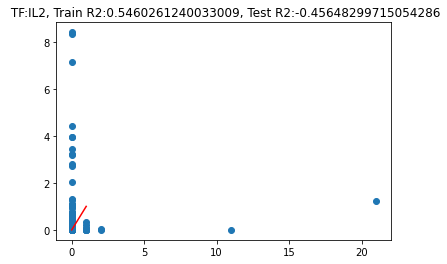

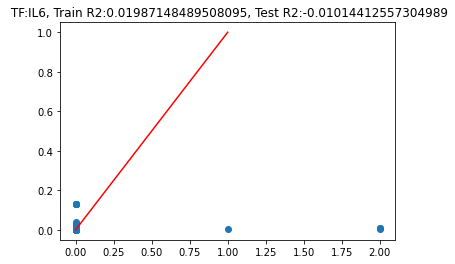

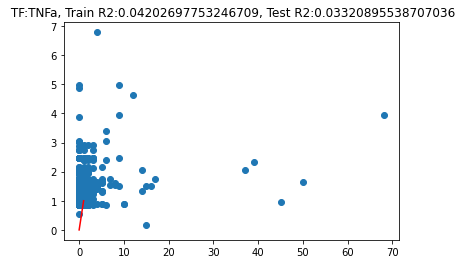

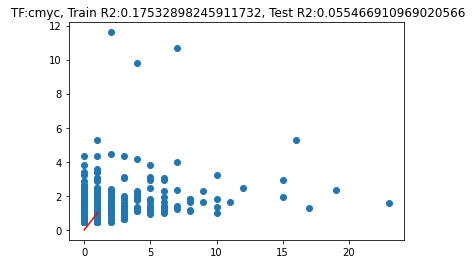

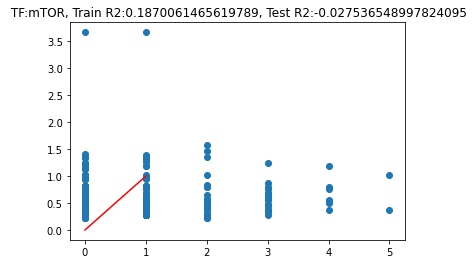

In [25]:
## Fit a RF regression to each TF and create a dictionary to save the results
## For that I'll need to scale the data


rf_dict = {}
unfit = []
for tf in upstream_nodes_dict:
    print(tf)
    rf = RandomForestRegressor()

    try:
        rf.fit(X = raw_counts_training[upstream_nodes_dict[tf]],
               y = raw_counts_training[tf])
        rf_dict[tf] = rf
        
    except:
        print(f"{tf} could not be fit")
        unfit.append(tf)
        
## For each model that was fit: predict and assess fit on the training and validation set

score_dict = {}
prediction_dict = {}
for tf in rf_dict:
    parents = upstream_nodes_dict[tf]
    ypred_test = rf_dict[tf].predict(raw_counts_validation[parents])
    ypred_train = rf_dict[tf].predict(raw_counts_training[parents])

    prediction_dict[tf] = (ypred_train, ypred_test)
    
    score_train = sklearn.metrics.r2_score(y_true=raw_counts_training[tf],
                                         y_pred = ypred_train)
    score_test = sklearn.metrics.r2_score(y_true=raw_counts_validation[tf],
                                         y_pred = ypred_test)
    score_dict[tf] = (score_train, score_test)
    print(f"{tf}:  {score_dict[tf]} ")
    
## Examine all the relationships

for tf in prediction_dict:
    plt.figure()
    plt.scatter(x = raw_counts_validation[tf], y = prediction_dict[tf][1])
    X = np.linspace(0,1)
    plt.plot( X, X, "r")
    plt.title( f" TF:{tf}, Train R2:{score_dict[tf][0]}, Test R2:{score_dict[tf][1]}")
